# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [13]:
data = pd.read_csv("weight-height.csv")
male_df =  data[data["Gender"] == "Male"]
female_df =  data[data["Gender"] == "Female"]

male_df.head()
print("Male Height mean:", male_df.Height.mean())
print("Male Height sd:", male_df.Height.std())
print("Male Weight mean:", male_df.Weight.mean())
print("Male Weight sd:", male_df.Weight.std())
print("Female Height mean:", female_df.Height.mean())
print("Female Height sd:", female_df.Height.std())
print("Female Weight mean:", female_df.Weight.mean())
print("Female Weight sd:", female_df.Weight.std())
  

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height sd: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight sd: 19.7811545167638
Female Height mean: 63.70877360342507
Female Height sd: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Weight sd: 19.022467805319028


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

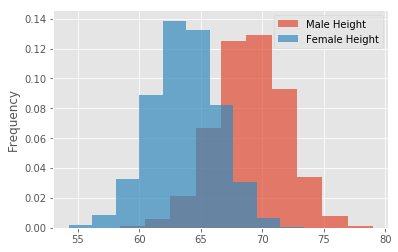

In [15]:
binsize = 10
male_df.Height.plot.hist(bins = binsize, density = True,  alpha = 0.7, label ="Male Height");
female_df.Height.plot.hist(bins = binsize, density = True, alpha = 0.7, label = 'Female Height');
plt.legend()
plt.show()

In [16]:
# Record your observations - are these inline with your personal observations?
# Men are generally taller than women
# Male mean height about 5'9"
# Female mean height about 5'4"
# Normal Distribution - both male and female heights follow normal distributions and are fairly similar 
# but male height values display more variance in this particular data set.


#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

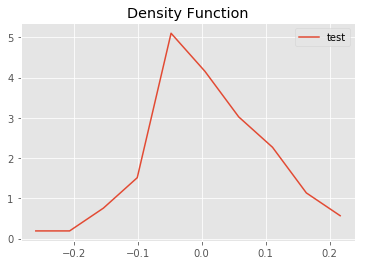

In [20]:
def density(x):
    
    n, bins = np.histogram(x, 10, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

  
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    return pdfx, pdfy


# Generate test data and test the function
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.title("Density Function")
plt.legend()
plt.show()

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

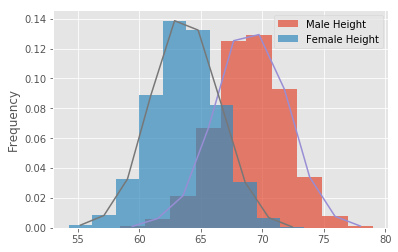

In [21]:
male_df.Height.plot.hist(bins = binsize, density = True,  alpha = 0.7, label ="Male Height");
female_df.Height.plot.hist(bins = binsize, density = True, alpha = 0.7, label = 'Female Height');
plt.legend()
x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)
plt.show()

#### Repeat above exerice for male and female weights

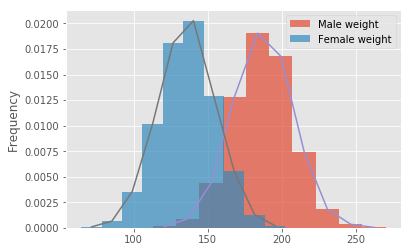

In [22]:
male_df.Weight.plot.hist(bins = binsize, density = True,  alpha = 0.7, label ="Male weight");
female_df.Weight.plot.hist(bins = binsize, density = True, alpha = 0.7, label = 'Female weight');
plt.legend()
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.show()

#### Write your observations in the cell below.

In [27]:
# Record your observations - are these inline with your personal observations?
# Comparing height and weight distributions for males and females, both overlapping graphs display normal 
# distributions. Males are heavier, or have more weight than females, which coincides with their advantage in the
# height category as well. There is a smaller region of overlap in weight as there was in height for males and
# females which indicates that there is less variation among weight values than height values and also lower 
# calculated probability. Females display a higher frequency near the mean weight than near the mean height.

# So whats the takeaway when comparing male and female heights and weights 
# It is easier to distinguish between a male and female based on their measurement of weight, rather than their 
# measure of height. 
# Male/Female Difference in Mean Height: 69.0 - 63.7= 5.3 inches 
# Diff Significance to Male Height: 8%
# Male/Female Difference in Mean Weight: 187.0 - 135.9 = 51.1 lbs 
# Diff Significance to Male Weight: 27%



#### Repeat Above experiments in seaborn and compare with your results. 

/Users/patrickrouth/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


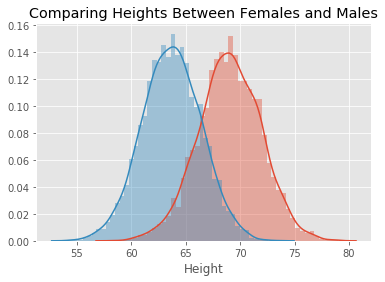

In [30]:
import seaborn as sns
sns.distplot(male_df['Height'])
sns.distplot(female_df['Height'])
plt.title('Comparing Heights Between Females and Males')
plt.show()

/Users/patrickrouth/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


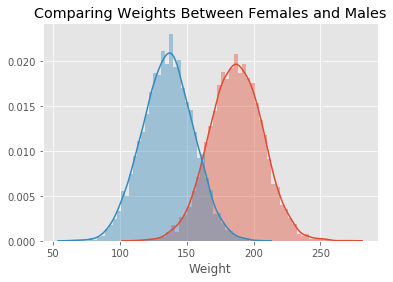

In [31]:
import seaborn as sns
sns.distplot(male_df['Weight'])
sns.distplot(female_df['Weight'])
plt.title('Comparing Weights Between Females and Males')
plt.show()

In [32]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?
# The Seaborn visualizations were much easier to construct and required little overhead. However, the level of detail
# is lacking compared to the initial matplotlib histograms we created. This may be due to the number of bins displayed 
# which dillutes the detail in understanding the values and probabilities for a large set of data.

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.